In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping , ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# Loading the Dataset
data = datasets.load_digits()
x = data.images
y = data.target

In [3]:
# Preprocess the Data
x = x.reshape((x.shape[0],8,8,1))  # (Number of Samples , Dimension , Channel)
x = x.astype('float32') / 255
y = to_categorical(y)

In [4]:
# Splitting the Data into Training and Test Sets
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [5]:
# Creating the Model
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64 , activation='relu'))
model.add(Dense(10 , activation='softmax'))

In [6]:
# Compile the Model
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [7]:
# Define Early Stopping and Model Checkpoint
earlystop = EarlyStopping(monitor='val_loss' , patience=10)
best_weights = ModelCheckpoint('best_weights.h5' , save_best_only=True , monitor='val_loss' , mode='min')

In [8]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),callbacks=[earlystop,best_weights])

Epoch 1/50
45/45 [==============================] - 1s 5ms/step - loss: 2.2841 - accuracy: 0.2303 - val_loss: 2.2538 - val_accuracy: 0.4083
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.1939 - accuracy: 0.4941 - val_loss: 2.1040 - val_accuracy: 0.6611
Epoch 3/50
 1/45 [..............................] - ETA: 0s - loss: 2.1069 - accuracy: 0.6250

C:\Users\Student\.conda\envs\AI045_NNDL\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 2ms/step - loss: 1.9569 - accuracy: 0.6409 - val_loss: 1.7816 - val_accuracy: 0.6944
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.5647 - accuracy: 0.7404 - val_loss: 1.3692 - val_accuracy: 0.7139
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.7745 - val_loss: 1.0112 - val_accuracy: 0.7833
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.8427 - val_loss: 0.7936 - val_accuracy: 0.8167
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.8657 - val_loss: 0.6608 - val_accuracy: 0.8583
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8727 - val_loss: 0.5818 - val_accuracy: 0.8556
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8845 - val_loss: 0.5264 - val_accuracy: 0.8611
Epoch 10/50
45/45 [============

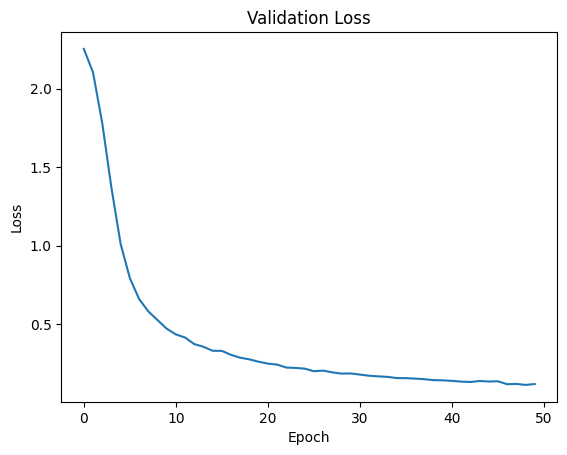

In [9]:
# Plotting the Validation Loss and Accuracy 
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

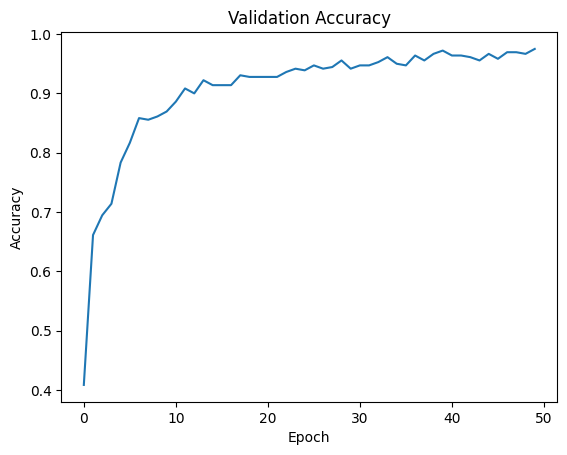

In [10]:
# Plotting the Validation Accuracy 
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
# Loading weights that yield the best validation accuracy
model.load_weights('best_weights.b5')

In [12]:
# Evaluate the Model on the Dataset
test_loss , test_acc = model.evaluate(x_test, y_test , verbose=0)
print("Test Loss : ",test_loss)
print("Test Accuracy : ",test_acc)

Test Loss :  0.1192333996295929
Test Accuracy :  0.9750000238418579
